

===========================January===========================




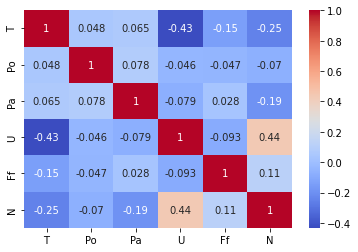



===========================February===========================




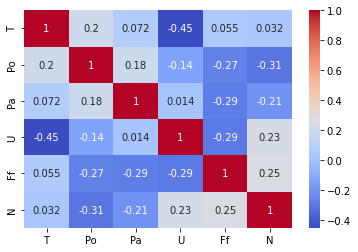



===========================March===========================




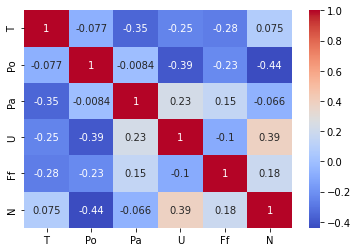



===========================April===========================




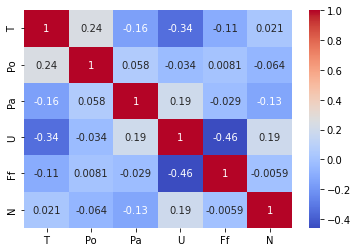



===========================May===========================




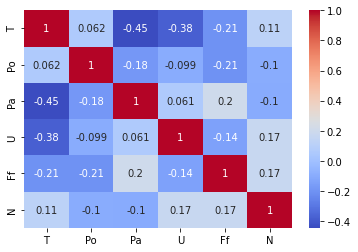



===========================June===========================




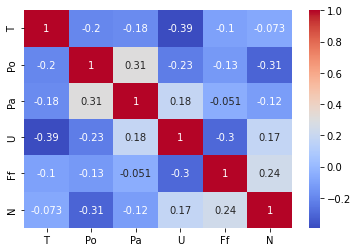



===========================July===========================




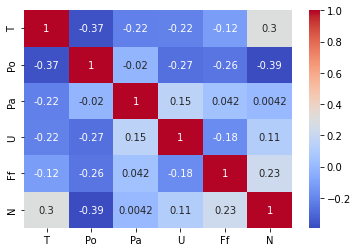



===========================August===========================




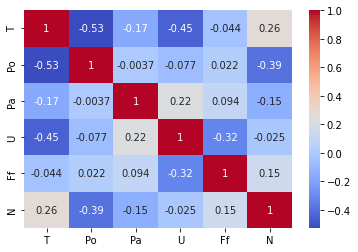



===========================September===========================




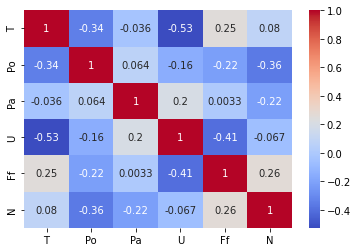



===========================October===========================




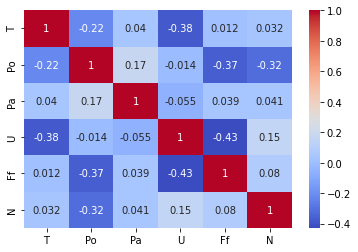



===========================November===========================




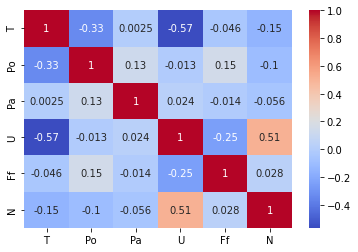

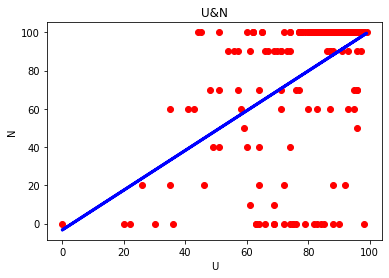



===========================December===========================




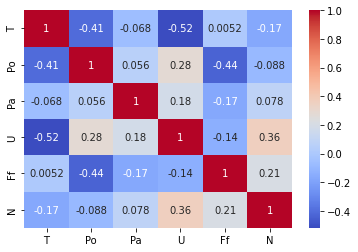

In [63]:
from sklearn.linear_model import LinearRegression
import matplotlib
import sklearn as sklearn
from scipy import ndimage
import numpy as np
import seaborn
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import plotly.express as px
import utils as ut
from scipy.stats import t

pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)


def gistTemp(day, night, month):
	day["time"] = "day"
	day = day[day["Time"].dt.month == month]
	night = night[night["Time"].dt.month == month]
	stdDay = day["T"].std()
	varDay = day.var()["T"]
	moDay = day["T"].mean()
	medDay = day["T"].median()
	stdNight = night["T"].std()
	medNight = night["T"].median()
	moNight = night["T"].mean()
	maxMinDay = day["T"].max()-day["T"].min()
	maxMinNight = night["T"].max()-night["T"].min()
	varNight = night.var()["T"]
	leftDay, rightDay = ut.coInt(moDay,ut.tValue(len(day["T"])),stdDay, len(day["T"]))
	leftNight, rightNight = ut.coInt(moNight,ut.tValue(len(night["T"])),stdNight, len(night["T"]))

	temp = pd.concat([day["T"], night["T"], day["time"]], axis=1, keys=["all", "night", "time"])
	temp["all"] = temp["all"].fillna(temp["night"])
	temp["time"] = temp["time"].fillna("night")
	temp = temp.drop(columns="night")
	temp["all"] = temp["all"].replace(to_replace="None", value=np.nan)
	title = plt.title("Temperature " + ut.numbToMonth(month))
	plt.setp(title, color='white')
	plt.tick_params(axis='both', colors='white')
	#print(temp)
	ax = seaborn.histplot(data=temp, x="all", hue="time", multiple="layer", bins=30)
	ax.yaxis.label.set_color('white')
	ax.xaxis.label.set_color('white')
	plt.show()

	print("                             День		Ночь")
	print("Медиана:                     {0:.2f}	|	{1:.2f}".format(medDay,medNight))
	print("Стандартное отклонение:      {0:.2f}	|	{1:.2f}".format(stdDay,stdNight))
	print("Мат. ожидание:               {0:.2f}	|	{1:.2f}".format(moDay,moNight))
	print("Дисперсия:                   {0:.2f}	|	{1:.2f}".format(varDay, varNight))
	print("Размах:                      {0:.2f}	|	{1:.2f}".format(maxMinDay, maxMinNight))
	print("Дов. интервал (0.95%):    {0:.2f} - {1:.2f} |    {2:.2f} - {3:.2f}".format(leftDay, rightDay, leftNight, rightNight))
	print("\n\n")


def gistHum(day, night, month):
	day["time"] = "day"
	day = day[day["Time"].dt.month == month]
	stdDay = day["U"].std()
	varDay = day.var()["U"]
	moDay = day["U"].mean()
	medDay = day["U"].median()
	night = night[night["Time"].dt.month == month]
	stdNight = night["U"].std()
	medNight = night["U"].median()
	moNight = night["U"].mean()
	varNight = night.var()["U"]
	maxMinDay = day["U"].max()-day["U"].min()
	maxMinNight = night["U"].max()-night["U"].min()
	leftDay, rightDay = ut.coInt(moDay,ut.tValue(len(day["U"])),stdDay, len(day["U"]))
	leftNight, rightNight = ut.coInt(moNight,ut.tValue(len(night["U"])),stdNight, len(night["U"]))
	temp = pd.concat([day["U"], night["U"], day["time"]], axis=1, keys=["all", "night", "time"])
	temp["all"] = temp["all"].fillna(temp["night"])
	temp["time"] = temp["time"].fillna("night")
	temp = temp.drop(columns="night")
	temp["all"] = temp["all"].replace(to_replace="None", value=np.nan)
	title = plt.title("Humidity " + ut.numbToMonth(month))
	plt.setp(title, color='white')
	plt.tick_params(axis='both', colors='white')
	# print(temp)
	ax = seaborn.histplot(data=temp, x="all", hue="time", multiple="layer", bins=30)
	ax.yaxis.label.set_color('white')
	ax.xaxis.label.set_color('white')
	plt.show()
	print("                             День		Ночь")
	print("Медиана:                     {0:.2f}	|	{1:.2f}".format(medDay,medNight))
	print("Стандартное отклонение:      {0:.2f}	|	{1:.2f}".format(stdDay,stdNight))
	print("Мат. ожидание:               {0:.2f}	|	{1:.2f}".format(moDay,moNight))
	print("Дисперсия:                   {0:.2f}	|	{1:.2f}".format(varDay, varNight))
	print("Размах:                      {0:.2f}	|	{1:.2f}".format(maxMinDay, maxMinNight))
	print("Дов. интервал (0.95%):    {0:2.2f} - {1:2.2f} |    {2:2.2f} - {3:2.2f}".format(leftDay, rightDay, leftNight, rightNight))
	print("\n\n")

def gistWind(data, month):
	#print(data[["DD","Ff"]].value_counts())
	windData = data[data["Time"].dt.month == month]
	windData = windData[["DD","Ff"]].value_counts(dropna= True).to_frame()
	windData = windData.astype(str)
	windData = windData[0].str.split(" ", expand=True).reset_index(level=0).reset_index(level=0)
	windData = windData.loc[windData['DD'] != "None"]
	windData = windData[["DD","Ff",0]]
	windRadians = ut.windRadians(windData)
	values = windRadians["DD"].to_list()
	values = np.array(values,dtype=float)
	speeds = windRadians["Ff"].to_list()
	speeds = np.array(speeds,dtype=int)
	windData.rename(columns={"DD":"direction","Ff":"strength",0:"frequency"},inplace=True)
	std = windData["strength"].std()
	moDaySpeed = windData["strength"].mean()
	medDaySpeed = windData["strength"].median()
	varDaySpeed = windData.var()["strength"]
	maxMin = windData["strength"].max()-windData["strength"].min()
	left, right = ut.coInt(moDaySpeed,ut.tValue(len(windData["strength"])),std, len(windData["strength"]))
	df = px.data.wind()
	df = df.replace(to_replace="N", value="C")

	#print(df)
	fig = px.bar_polar(windData, r="frequency", theta="direction",
					   color="strength", template="plotly_dark",
					   color_discrete_sequence= px.colors.sequential.Plasma_r, start_angle=-45)
	fig.update_layout(title_text='Wind rose '+ str(ut.numbToMonth(month)),paper_bgcolor="LightSteelBlue",
					  margin=dict(l=0, r=100, t=30, b=20))
	fig.show()
	d,s = ut.avgGeometryDirections(values,speeds)
	print("Среднее геометрическое: ")
	print("        направление: {:.2f}".format(d))
	print("        скорость: {:.2f}".format(s))
	print("Стандартное отклонение по скорости: {:.2f}".format(std))
	print("Размах по скорости: {:.2f}".format(maxMin))
	print("Медиана по скорости: {:.2f}".format(medDaySpeed))
	print("Мат. ожидание по скорости: {:.2f}".format(moDaySpeed))
	print("Дисперсия по скорости: {:.2f}".format(varDaySpeed))
	print("Доверительный интервал (0.95%): {0:.2f} - {1:.2f}".format(left, right))

def gistCloud(data, month):
	temp = data[data["Time"].dt.month == month]
	temp = temp.sort_values(by=["N"])
	moDay = temp["N"].mean()
	medDay = temp["N"].median()
	varDay = temp.var()["N"]
	maxMin = temp["N"].max()-temp["N"].min()
	std = temp["N"].std()
	left, right = ut.coInt(moDay,ut.tValue(len(temp["N"])),std, len(temp["N"]))

	temp.rename(columns={"N":"Cloud cover","Ff":"strength",0:"frequency"},inplace=True)
	title = plt.title("Clouds " + ut.numbToMonth(month))
	plt.setp(title, color='white')
	plt.tick_params(axis='both', colors='white')
	ax = seaborn.histplot(data=temp,x="Cloud cover" ,multiple="layer")
	ax.yaxis.label.set_color('white')
	ax.xaxis.label.set_color('white')
	plt.show()
	print("Размах: {:.2f}".format(maxMin))
	print("Стандартное отклонение: {:.2f}".format(std))
	print("Медиана: {:.2f}".format(medDay))
	print("Мат. ожидание: {:.2f}".format(moDay))
	print("Дисперсия: {:.2f}".format(varDay))
	print("Доверительный интервал (0.95%): {0:.2f} - {1:.2f}".format(left, right))

def korrel(data,month):
	kor = data[data["Time"].dt.month == month]
	seaborn.heatmap(kor.corr(), annot = True, cmap=seaborn.color_palette("coolwarm",as_cmap=True))
	seaborn.color_palette("viridis", as_cmap=True)
	kordi = kor.corr().to_dict()
	f,s = findMax(kordi)
	plt.show()
	if f!="":
		printRegression(kor, f, s)

def printRegression(data,first,second):

	x = data[[first]]
	y = data[[second]]
	x = x.replace(to_replace=np.NAN, value="0")
	y = y.replace(to_replace=np.NAN, value="0")
	regress = LinearRegression()
	regress.fit(x,y)
	plt.scatter(x, y,  color='red')
	plt.plot(x, regress.predict(x), color='blue', linewidth=3)
	plt.title(first+"&"+ second)
	plt.xlabel(first)
	plt.ylabel(second)

	plt.show()


def findMax(kordi:dict):
	max = 0
	first = ""
	second = ""
	for key,value in kordi.items():
		for key1,value1 in value.items():
			if value1 !=1.0:
				if value1>max:
					max = value1
					first = key
					second = key1
	if max>0.5:
		return first,second
	else: return "",""


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

data = pd.read_csv("moscow.csv", index_col=False, skiprows=6,
                   encoding="utf-8", sep=";")
data.rename(columns={"Местное время в Москве (ВДНХ)": "Time"}, inplace=True)
data["Time"] = pd.to_datetime(data["Time"])
data = data.drop(
	columns=["Cl", "Ch", "Cm", "E", "Tg", "E'", "sss", "VV", "H", "Nh", "WW", "W1", "H",
	         "W2", "tR", "ff10", "ff3", "RRR", "Tx", "Td", "Tn", "P"])
data = data.sort_values(by="Time")
data = ut.windCode(data)
data = ut.cloudCode(data)

dfDay = data[(data["Time"].dt.hour >= 9) & (data["Time"].dt.hour < 21)]
dfNight = data[(data["Time"].dt.hour >= 0) & (data["Time"].dt.hour < 9) | (data["Time"].dt.hour >= 21) & (
		data["Time"].dt.hour < 24)]
print("======================================================")
#print(dfDay)
dfDay["T"] = pd.to_numeric(dfDay["T"], errors="coerce")
print("======================================================")
#gistWind(data,1)

def lab1():
	for month in range(1, 13):
		print("")
		print("")
		print("==========================="+ut.numbToMonth(month)+"===========================")
		print("")
		print("")
		gistTemp(dfDay, dfNight, month)
		gistHum(dfDay,dfNight,month)
		gistWind(data,month)
		gistCloud(data,month)
def lab2():
	for month in range(1, 13):
		print("")
		print("")
		print("==========================="+ut.numbToMonth(month)+"===========================")
		print("")
		print("")
		korrel(data,month)
lab2()
# print(dfDay[dfDay["Time"].dt.month == 2])